In [38]:
import json
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bert_score import BERTScorer

%matplotlib inline

In [3]:
with open('./aug_train_test_labeled_dataset_afterVal.json', 'r') as f:
    dataset = json.load(f)
with open('./eval_results/MaskedSent_generated_summary_newDs_e9.txt', 'r') as f:
    maskedSent_results = [line.rstrip() for line in f]
with open('./eval_results/TML_maskedSent_generated_summary_newDs_e7.txt', 'r') as f:
    TML_results = [line.rstrip() for line in f]
with open('./eval_results/MaskedSent_generated_summary_aug_e4.txt', 'r') as f:
    maskedSent_aug_results = [line.rstrip() for line in f]
with open('./eval_results/TML_maskedSent_generated_summary_aug_e6.txt', 'r') as f:
    TML_aug_results = [line.rstrip() for line in f]

In [26]:
P_maskedSent = []
R_maskedSent = []
F1_maskedSent = []
scorer = BERTScorer(lang="en", rescale_with_baseline=True)
for r, s in zip(maskedSent_results, dataset['summary_test']):
    P_temp, R_temp, F1_temp = scorer.score([r], [s])
    P_maskedSent.append(P_temp[0].item())
    R_maskedSent.append(R_temp[0].item())
    F1_maskedSent.append(F1_temp[0].item())

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
P_TML = []
R_TML = []
F1_TML = []
scorer = BERTScorer(lang="en", rescale_with_baseline=True)
for r, s in zip(TML_results, dataset['summary_test']):
    P_temp, R_temp, F1_temp = scorer.score([r], [s])
    P_TML.append(P_temp[0].item())
    R_TML.append(R_temp[0].item())
    F1_TML.append(F1_temp[0].item())

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
P_maskedSent_aug = []
R_maskedSent_aug = []
F1_maskedSent_aug = []
scorer = BERTScorer(lang="en", rescale_with_baseline=True)
for r, s in zip(maskedSent_aug_results, dataset['summary_test']):
    P_temp, R_temp, F1_temp = scorer.score([r], [s])
    P_maskedSent_aug.append(P_temp[0].item())
    R_maskedSent_aug.append(R_temp[0].item())
    F1_maskedSent_aug.append(F1_temp[0].item())

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
P_TML_aug = []
R_TML_aug = []
F1_TML_aug = []
scorer = BERTScorer(lang="en", rescale_with_baseline=True)
for r, s in zip(TML_aug_results, dataset['summary_test']):
    P_temp, R_temp, F1_temp = scorer.score([r], [s])
    P_TML_aug.append(P_temp[0].item())
    R_TML_aug.append(R_temp[0].item())
    F1_TML_aug.append(F1_temp[0].item())

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
F1_mean = []
for r1, r2, r3, r4 in zip(F1_maskedSent, F1_TML, F1_maskedSent_aug, F1_TML_aug):
    mean = np.mean([r1, r2, r3, r4])
    F1_mean.append(mean)

In [57]:
sns.color_palette("pastel", n_colors=8)

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529)]

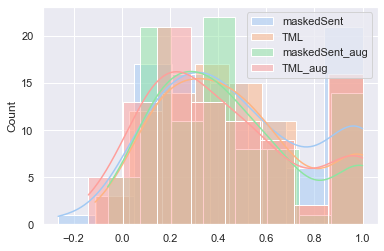

In [58]:
sns.set(style="darkgrid")
colors = sns.color_palette("pastel", n_colors=8)

sns.histplot(data=F1_maskedSent, color=colors[0], label="maskedSent", kde=True)
sns.histplot(data=F1_TML, color=colors[1], label="TML", kde=True)
sns.histplot(data=F1_maskedSent_aug, color=colors[2], label="maskedSent_aug", kde=True)
sns.histplot(data=F1_TML_aug, color=colors[3], label="TML_aug", kde=True)

plt.legend() 
plt.show()

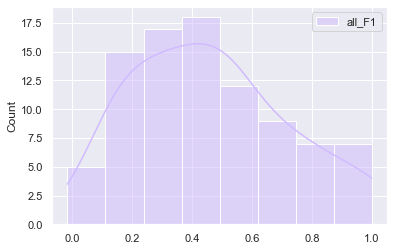

In [185]:
sns.set(style="darkgrid")
sns.histplot(data=F1_mean, color=colors[4], label="all_F1", kde=True)
plt.legend() 
plt.show()

In [127]:
selected_idx = []
selected_scores = []

random.seed(47)
selected = random.sample(list(enumerate(F1_mean)), k=50)
for idx, score in selected:
    selected_idx.append(idx)
    selected_scores.append(score)

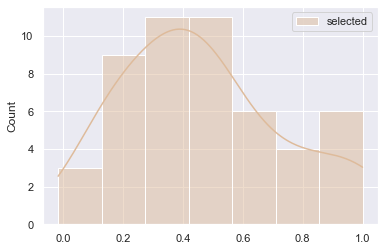

In [128]:
sns.set(style="darkgrid")
sns.histplot(data=selected_scores, color=colors[5], label="selected", kde=True)
plt.legend() 
plt.show()

In [129]:
selected_scores.remove(F1_mean[5])
selected_idx.remove(5)
selected_scores.append(F1_mean[7])
selected_idx.append(7)

In [135]:
selected_scores.remove(F1_mean[1])
selected_idx.remove(1)
selected_scores.append(F1_mean[57])
selected_idx.append(57)

In [141]:
selected_scores.remove(F1_mean[15])
selected_idx.remove(15)
selected_scores.append(F1_mean[83])
selected_idx.append(83)

In [152]:
selected_scores.remove(F1_mean[62])
selected_idx.remove(62)
selected_scores.append(F1_mean[4])
selected_idx.append(4)

In [176]:
remove = [7, 36, 54, 22, 30, 35, 37, 38, 50, 60, 76]
append = [9, 14, 16, 20, 25, 31, 47, 52, 66, 67, 75]

for r, a in zip(remove, append):
    selected_scores.remove(F1_mean[r])
    selected_idx.remove(r)
    selected_scores.append(F1_mean[a])
    selected_idx.append(a)

In [215]:
sorted_selected_idx = np.sort(selected_idx)
for i, (s, f1) in enumerate(zip(dataset['summary_test'], F1_mean)):
    if i in selected_idx:
        print(str(i+1) + '. ' + s + '\n' + str(f1) + '\n')
        print(maskedSent_results[i] + '\n' + TML_results[i]
              + '\n' + maskedSent_aug_results[i] + '\n' + TML_aug_results[i] + '\n')

1. execute automated order processing
0.3611586168408394

prepare shipping invoice
prepare shipping invoice
prepare customer order
manage customer account configuration

3. publish job advertisement
0.454096183180809

create job advertisement
create and post advertisement
create and publish job advert
create and send advertisement

4. execute crowdsourcing
0.4242165684700012

request crowd-based solutions
upload crowd-request
handle crowd request
operate problem solving process

5. manage coffee break
0.35974754579365253

serve coffee
prepare coffee
prepare coffee
preparation of the menu for the event

7. manage incident
0.6387428715825081

diagnosis made
incident identification and categorization
classify incident
manage incident

9. list book for sale
0.1873598382808268

book title
enter book title
apply for the first time
registration for the book

10. handle urgent record request
0.5763343535363674

complete record request
complete record request
total record demand
full record req

In [180]:
len(selected_scores)

50

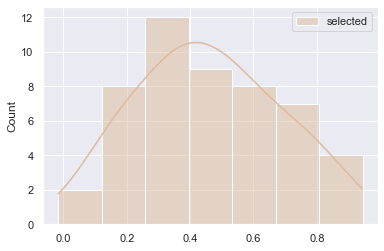

In [216]:
sns.set(style="darkgrid")
sns.histplot(data=selected_scores, color=colors[5], label="selected", kde=True)
plt.legend() 
plt.show()

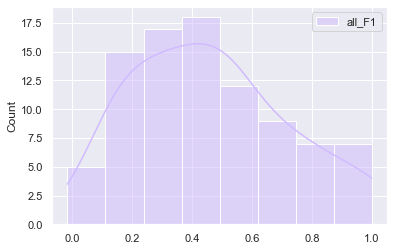

In [183]:
sns.set(style="darkgrid")
sns.histplot(data=F1_mean, color=colors[4], label="all_F1", kde=True)
plt.legend() 
plt.show()

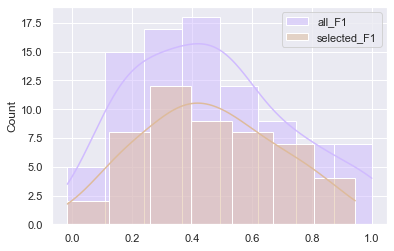

In [217]:
sns.set(style="darkgrid")
sns.histplot(data=F1_mean, color=colors[4], label="all_F1", kde=True)
sns.histplot(data=selected_scores, color=colors[5], label="selected_F1", kde=True)
plt.legend() 
plt.show()

In [218]:
doc = []
doc_len = {}
for i, d in enumerate(dataset['document_test']):
    if i in selected_idx:
        length = len(d.split(', '))
        doc_len.update({i:length})
        doc.append(d)

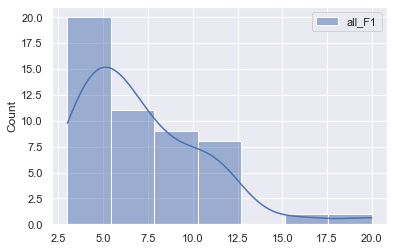

In [219]:
sns.set(style="darkgrid")
sns.histplot(data=doc_len.values(), color=colors[1], label="all_F1", kde=True)
plt.legend() 
plt.show()

In [220]:
sorted_dict = {}
sorted_keys = sorted(doc_len, key=doc_len.get)

for w in sorted_keys:
    sorted_dict[w] = doc_len[w]

print(sorted_dict)

{2: 3, 33: 3, 83: 3, 88: 3, 0: 4, 3: 4, 16: 4, 21: 4, 43: 4, 52: 4, 53: 4, 64: 4, 65: 4, 4: 5, 6: 5, 23: 5, 25: 5, 46: 5, 48: 5, 89: 5, 9: 6, 14: 6, 24: 6, 49: 6, 56: 6, 58: 6, 67: 6, 70: 6, 13: 7, 29: 7, 75: 7, 12: 8, 40: 8, 45: 8, 55: 8, 69: 8, 20: 9, 71: 9, 8: 10, 44: 10, 31: 11, 32: 11, 47: 11, 73: 11, 85: 11, 59: 12, 61: 12, 78: 12, 57: 16, 66: 20}


In [221]:
one = []
two = []
three = []
four = []
five = []
for i, k in enumerate(sorted_keys):
    batch_num = (i+1) % 5
    if batch_num == 1:
        one.append(k)
    if batch_num == 2:
        two.append(k)
    if batch_num == 3:
        three.append(k)
    if batch_num == 4:
        four.append(k)
    if batch_num == 0:
        five.append(k)

In [222]:
print(one)
print(two)
print(three)
print(four)
print(five)

[2, 3, 53, 23, 9, 58, 75, 69, 31, 59]
[33, 16, 64, 25, 14, 67, 12, 20, 32, 61]
[83, 21, 65, 46, 24, 70, 40, 71, 47, 78]
[88, 43, 4, 48, 49, 13, 45, 8, 73, 57]
[0, 52, 6, 89, 56, 29, 55, 44, 85, 66]


In [ ]:
# 9 -> 0.5763343535363674
# 14 -> 0.49113554507493973
# 16 -> 0.6912201642990112
# 20 -> 0.49059104919433594
# 25 -> 0.5814628899097443
# 31 -> 0.15088315308094025
# 47 -> 0.7013055831193924 
# 52 -> 0.49040159955620766
# 66 -> 0.5417676642537117
# 67 -> 0.840253196656704
# 75 -> 0.263495285063982
# other models results are considered if number of default model results < 3 ? (if they make sense)
# 20, 57


In [ ]:
# delete 36, 54
# check for the ones without pictures or tasks missing (replace them or create them) 
# could create 22, 76
# remove 22 (0.3534620627760887)
# remove 30 (0.47149311378598213)
# remove 35 (0.5870166420936584)
# remove 37 (0.08781486689986195)
# remove 38 (0.20840740948915482)
# remove 50 (0.13595446851104498)
# remove 60 (0.47725117206573486)
# remove 76 (0.5200803503394127)
# remove 7 (0.5311042182147503)
# remove 61 (0.5648139454424381)

In [155]:
sorted_selected_idx

array([ 0,  2,  3,  4,  6,  7,  8, 12, 13, 21, 22, 23, 24, 29, 30, 32, 33,
       35, 36, 37, 38, 40, 43, 44, 45, 46, 48, 49, 50, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 64, 65, 69, 70, 71, 73, 76, 78, 83, 85, 88, 89])

In [156]:
np.array([x+1 for x in sorted_selected_idx])

array([ 1,  3,  4,  5,  7,  8,  9, 13, 14, 22, 23, 24, 25, 30, 31, 33, 34,
       36, 37, 38, 39, 41, 44, 45, 46, 47, 49, 50, 51, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 65, 66, 70, 71, 72, 74, 77, 79, 84, 86, 89, 90])

In [223]:
F1_mean[61]

0.5648139454424381

In [224]:
dataset['summary_test']

['execute automated order processing',
 'execute cutting',
 'publish job advertisement',
 'execute crowdsourcing',
 'manage coffee break',
 'manage production planning',
 'manage incident',
 'fulfill order',
 'list book for sale',
 'handle urgent record request',
 'process manufacture work order notification',
 'carry out attack',
 'manage documents',
 'operate online consulting with patient',
 'generate vendor master record',
 'request vendor master record',
 'sort invoice priority',
 'handle po',
 'manage interview and select candidate',
 'initiate phd program',
 'create purchase requisition to purchase order',
 'request vendor master record',
 'procure phone',
 'prepare mortgage offer documents',
 'address ministerial enquiry',
 'initiate project',
 'decide on holding marketing review',
 'manage online order of school',
 'check invoice mismatches',
 'fill information and check completeness',
 'manage phd program',
 'manage goods receipt',
 'check appointment approval',
 'manufacture